#  Hate Speech Detection Project

According to the United Nation, the term hate speech is **understood as any kind of communication in speech, writing or behaviour, that attacks or uses pejorative or discriminatory language with reference to a person or a group on the basis of who they are, in other words, based on their religion, ethnicity, nationality, race, colour, descent, gender or other identity factor.** It is believed that hate speech is strongly associated with actual hate crime. To avoid such crime, we have to detect them before it happens. 

![Image of Hate Speech](https://www.coe.int/documents/2323735/7720949/HateSpeech-webinar+cybercrime.jpg/8c9efedc-8c26-6996-cf55-915ac800282c)

Social media is a platform where some people publish their own opinions, some of which may be hate speech or use offensive language. Twitter is one of the most common social media; hence in this project we use tweets to analyze and predict whether they are hate speech, offensive language, or neither of them. 

We will use a number of machine learning algorithms to predict the results and compare their accuracy. They include Logistic Regression, Random Forest, SVM, Decision Tree, K-nearest Neighbors, and Naive Bayes.

In [41]:
# !pip install streamlit
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from textstat.textstat import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
from PIL import Image
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to /Users/ching/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ching/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ching/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ching/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [42]:
# read dataset1 csv file

data_tweet = pd.read_csv("Dataset1.csv", sep = ",")
data_tweet = data_tweet[['class', 'tweet']]

data_tweet.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [43]:
# summary of the dataset

data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   24783 non-null  int64 
 1   tweet   24783 non-null  object
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


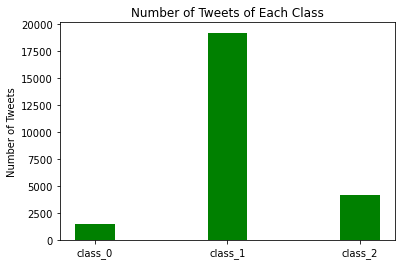

In [44]:
# plot the graph of number of tweets of each class

count_class = pd.DataFrame({'class_0': [np.sum(data_tweet['class'] == 0)], 'class_1': [np.sum(data_tweet['class'] == 1)],\
     'class_2': [np.sum(data_tweet['class'] == 2)]})

x, y = count_class.columns, count_class.iloc[0]
plt.bar(x, y, width = 0.3, color = 'green')
plt.title('Number of Tweets of Each Class')
plt.ylabel('Number of Tweets')
plt.show()

In [45]:
# number of words

df1 = pd.DataFrame()

df1['number_of_words'] = data_tweet['tweet'].apply(lambda x: len(str(x).split(" ")))
df2 = pd.concat([data_tweet['tweet'], data_tweet['class'], df1], axis = 1)

# number of characters

df2['number_of_characters'] = data_tweet['tweet'].str.len()
df2

,tweet,class,number_of_words,number_of_characters
0,!!! RT @mayasolovely: As a woman you shouldn't...,2,25,140
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,16,85
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,21,120
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,9,62
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,26,137
...,...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1,19,146
24779,"you've gone and broke the wrong heart baby, an...",2,13,70
24780,young buck wanna eat!!.. dat nigguh like I ain...,1,13,67
24781,youu got wild bitches tellin you lies,1,7,37


In [46]:
# average word length

def avg_word_len(tweet):
    words = tweet.split()
    return (sum(len(word) for word in words)/len(words))

df2['average_word_length'] = data_tweet['tweet'].apply(lambda x: avg_word_len(x))
df2

,tweet,class,number_of_words,number_of_characters,average_word_length
0,!!! RT @mayasolovely: As a woman you shouldn't...,2,25,140,4.640000
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,16,85,4.375000
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,21,120,4.761905
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,9,62,6.000000
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,26,137,4.307692
...,...,...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1,19,146,6.736842
24779,"you've gone and broke the wrong heart baby, an...",2,13,70,4.461538
24780,young buck wanna eat!!.. dat nigguh like I ain...,1,13,67,4.230769
24781,youu got wild bitches tellin you lies,1,7,37,4.428571


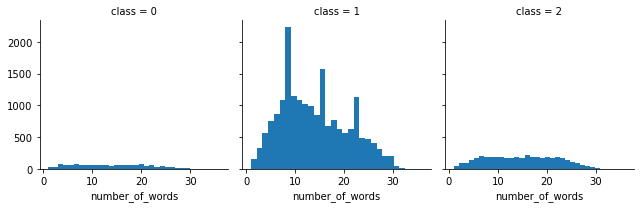

In [47]:
# visualize the number of words

graph1 = sns.FacetGrid(df2, col = 'class')
graph1.map(plt.hist, 'number_of_words', bins = 30)

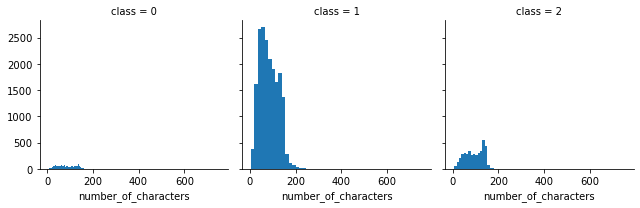

In [48]:
# visualize the number of characters

graph1 = sns.FacetGrid(df2, col = 'class')
graph1.map(plt.hist, 'number_of_characters', bins = 50)

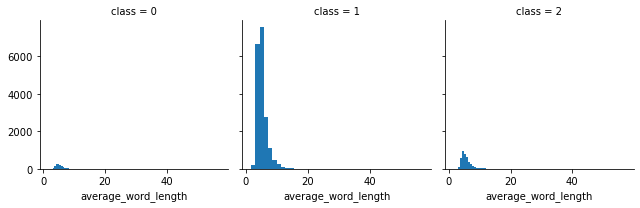

In [49]:
# visualize the average word length

graph2 = sns.FacetGrid(df2, col = 'class')
graph2.map(plt.hist, 'average_word_length', bins = 40)

In [50]:
# create a optimal stopword list

stop = set(stopwords.words('english'))
negation = set(['not', 'don', "don't", 'ain', 'aren', "aren't", "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
            'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",'mightn', "mightn't", 'mustn',
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren',
            "weren't", 'won', "won't", 'wouldn', "wouldn't", 'couldn'])
stop = list(stop - negation)

# self-define a stopword list 

more_stopwords = ["english", "rt", 'ya', 'yea', 'another', 'yo', 'us', 'cant', 'im', 'yeah', 'tweets', 'tweet', 
                  'lmao', 'Lmao', 'LMAO', 'u', 'lol', 'amp', 'thats', 'youre', 'would']

# combine the two stopword lists together

for i in range(len(more_stopwords)):
    stop.append(more_stopwords[i])
    
stop

['them',
 'to',
 'too',
 'those',
 'over',
 've',
 'herself',
 't',
 'yours',
 'having',
 'did',
 'll',
 'some',
 'each',
 'the',
 'here',
 'yourself',
 'few',
 'you',
 'their',
 'have',
 'am',
 'off',
 'whom',
 'of',
 'he',
 'above',
 'ma',
 'between',
 'before',
 'will',
 'what',
 'be',
 "that'll",
 'at',
 "it's",
 'while',
 'an',
 'o',
 'themselves',
 'until',
 'm',
 'other',
 "she's",
 'from',
 'd',
 'nor',
 'theirs',
 'had',
 'down',
 'very',
 'up',
 'hers',
 'with',
 "should've",
 'my',
 'below',
 'when',
 'but',
 'can',
 "you're",
 'me',
 'being',
 'if',
 'has',
 'these',
 'about',
 'as',
 'how',
 'our',
 'do',
 'than',
 'own',
 'your',
 'there',
 'same',
 'most',
 'all',
 'just',
 'does',
 'this',
 'they',
 'against',
 'ours',
 'is',
 'a',
 'more',
 'so',
 'then',
 'its',
 'again',
 'during',
 'through',
 'were',
 'she',
 "you'll",
 're',
 'doing',
 'that',
 'in',
 'on',
 'no',
 'been',
 'y',
 'out',
 'it',
 'by',
 'under',
 'his',
 'myself',
 'him',
 'for',
 'was',
 'after',
 

In [51]:
# define a function to clean data and make it suitable for modelling

def clean_data(dataset):
    
    dataset = pd.Series(dataset)

    # make all words to lowercase, and remove redundant space

    data_tweet_str = dataset.apply(lambda x: ' '.join(x.lower().strip() for x in x.split()))

    # remove user names

    data_tweet_wo_user = data_tweet_str.apply(lambda x: " ".join(x for x in x.split() if x[0] != '@'))

    # remove all punctuations

    data_tweet_str_wo_punc = data_tweet_wo_user.str.replace('[^\w\s]','')

    # remove stopwords

    data_tweet_str_wo_punc_wo_stop = data_tweet_str_wo_punc.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

    # remove web address

    data_tweet_str_wo_punc_wo_stop_wo_http = data_tweet_str_wo_punc_wo_stop.apply(lambda x: " ".join(x for x in x.split() \
                                                                                                 if x[0:4] != 'http'))
    # remove numbers and words starting with numbers

    number = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']

    data_tweet_str_wo_punc_wo_stop_wo_http_wo_no = data_tweet_str_wo_punc_wo_stop_wo_http\
                                                    .apply(lambda x: " ".join(x for x in x.split() \
                                                            if x[0] not in number))

    # lemmatization

    lemmatizer = WordNetLemmatizer() 

    dataset_clean = data_tweet_str_wo_punc_wo_stop_wo_http_wo_no \
                    .apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    
    return (dataset_clean)

In [52]:
# combine clean tweets with original dataset

data_tweet['clean_tweets'] = clean_data(data_tweet['tweet'])
data_tweet[['tweet','clean_tweets']]

,tweet,clean_tweets
0,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldnt complain cleaning house man alw...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat coldtyga dwn bad cuffin dat hoe place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cry confused shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,yous muthafin lie right tl trash mine bible sc...
24779,"you've gone and broke the wrong heart baby, an...",youve gone broke wrong heart baby drove rednec...
24780,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like aint fuck...
24781,youu got wild bitches tellin you lies,youu got wild bitch tellin lie


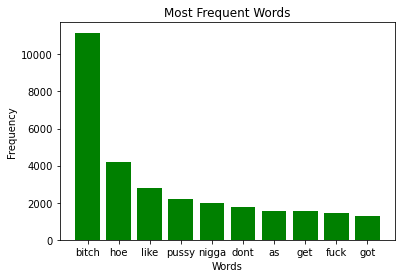

In [53]:
# most frequent words

freq = pd.Series(' '.join(data_tweet['clean_tweets']).split()).value_counts()[:10]
plt.bar(freq.index, freq, color = 'green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words')
plt.show()

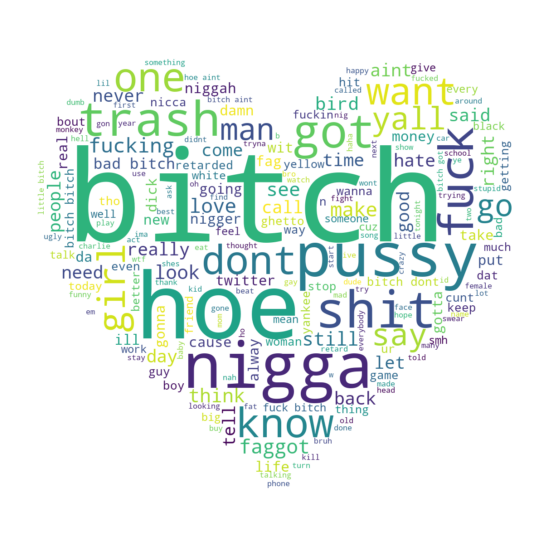

In [54]:
# visualize most frequent words in all tweets

mask = np.array(Image.open('heart.png'))

all_words = ' '.join([text for text in data_tweet['clean_tweets'] ])
wordcloud = WordCloud(width = 800, height = 800, background_color = "white", mask = mask).generate(all_words)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [55]:
# overall tweet sentiment

overall_sentiment = TextBlob(str(data_tweet['clean_tweets'])).sentiment[0]
print("The overall sentiment of all tweets is: " + str(overall_sentiment), "1: positive", "-1: negative", sep = "\n")

The overall sentiment of all tweets is: -0.09285714285714282
1: positive
-1: negative


In [56]:
from ipynb.fs.full.data_preparation import hate_speech_words, offensive_words, fox_comments, microposts_final, linkedin_post

# combine other datasets with the original dataset of tweets

hate_speech_words['clean_tweets'] = clean_data(hate_speech_words['tweet'])
offensive_words['clean_tweets'] = clean_data(offensive_words['tweet'])
fox_comments['clean_tweets'] = clean_data(fox_comments['tweet'])
microposts_final['clean_tweets'] = clean_data(microposts_final['tweet'])
linkedin_post['clean_tweets'] = clean_data(linkedin_post['tweet'])

data_tweet = pd.concat([data_tweet, hate_speech_words, offensive_words, fox_comments, microposts_final, linkedin_post]).reset_index(drop = True)
data_tweet.columns = ['class', 'texts', 'clean_texts']
data_tweet

,class,texts,clean_texts
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldnt complain cleaning house man alw...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat coldtyga dwn bad cuffin dat hoe place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cry confused shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told
...,...,...,...
69001,0,we should forcibly remove all the foreigners f...,forcibly remove foreigner
69002,0,we should forcibly remove all the immigrants f...,forcibly remove immigrant
69003,0,dalits are unworthy of the Gods love,dalits unworthy god love
69004,0,dalits are worthless,dalits worthless


In [57]:
# convert the tweets into statistical numbers

vectorizer = TfidfVectorizer(ngram_range = (1, 4), max_features = 10000, use_idf = True)
tfidf = vectorizer.fit_transform(data_tweet['clean_texts'])
tfidf

<69006x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 697443 stored elements in Compressed Sparse Row format>

In [58]:
# data split

X = tfidf
y = data_tweet['class'].astype(int)
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [59]:
# Logistic Regression 

model_lr = LogisticRegression(C = 2, max_iter = 500).fit(x_train_tfidf, y_train)
y_pred_lr = model_lr.predict(x_test_tfidf)
report_lr = classification_report(y_test, y_pred_lr)

print(report_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
label_lr = "Logistic Regression"
print(label_lr)
print('Accuracy: ', acc_lr)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      7358
           1       0.92      0.88      0.90      5830
           2       0.71      0.73      0.72      7514

    accuracy                           0.77     20702
   macro avg       0.78      0.77      0.78     20702
weighted avg       0.77      0.77      0.77     20702

Logistic Regression
Accuracy:  0.7661095546324027


In [60]:
# Decision Tree

model_dt = tree.DecisionTreeClassifier().fit(x_train_tfidf, y_train)
y_pred_dt = model_dt.predict(x_test_tfidf)
report_dt = classification_report(y_test, y_pred_dt)

print(report_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
label_dt = 'Decision Tree'
print(label_dt)
print('Accuracy: ', acc_dt)

              precision    recall  f1-score   support

           0       0.63      0.69      0.66      7358
           1       0.89      0.86      0.87      5830
           2       0.68      0.64      0.66      7514

    accuracy                           0.72     20702
   macro avg       0.73      0.73      0.73     20702
weighted avg       0.72      0.72      0.72     20702

Decision Tree
Accuracy:  0.7193024828518984


In [61]:
# kNN

model_knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', p = 1).fit(x_train_tfidf, y_train)
y_pred_knn = model_knn.predict(x_test_tfidf)
report_knn = classification_report(y_test, y_pred_knn)

print(report_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
label_knn = 'K-nearest Neighbors'
print(label_knn)
print('Accuracy: ', acc_knn)

              precision    recall  f1-score   support

           0       0.40      0.71      0.51      7358
           1       0.89      0.43      0.58      5830
           2       0.55      0.35      0.43      7514

    accuracy                           0.50     20702
   macro avg       0.61      0.50      0.51     20702
weighted avg       0.59      0.50      0.50     20702

K-nearest Neighbors
Accuracy:  0.500627958651338


In [62]:
# Random Forest

model_rf = RandomForestClassifier(n_estimators = 200).fit(x_train_tfidf, y_train)
y_pred_rf = model_rf.predict(x_test_tfidf)
report_rf = classification_report(y_test, y_pred_rf)

print(report_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
label_rf = 'Random Forest'
print(label_rf)
print('Accuracy: ', acc_rf)

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      7358
           1       0.91      0.89      0.90      5830
           2       0.70      0.67      0.68      7514

    accuracy                           0.74     20702
   macro avg       0.76      0.76      0.76     20702
weighted avg       0.75      0.74      0.75     20702

Random Forest
Accuracy:  0.7446623514636267


In [63]:
# SVM

model_svm = LinearSVC().fit(x_train_tfidf, y_train)
y_pred_svm = model_svm.predict(x_test_tfidf)
report_svm = classification_report(y_test, y_pred_svm)

print(report_svm)
acc_svm = accuracy_score(y_test, y_pred_svm)
label_svm = 'SVM'
print(label_svm)
print('Accuracy: ', acc_svm)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      7358
           1       0.90      0.88      0.89      5830
           2       0.70      0.71      0.71      7514

    accuracy                           0.76     20702
   macro avg       0.77      0.77      0.77     20702
weighted avg       0.76      0.76      0.76     20702

SVM
Accuracy:  0.7594918365375326


In [64]:
# Naive Bayes

x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state = 42, test_size = 0.3)
model_nb = GaussianNB().fit(x_train_tfidf, y_train)
y_pred_nb = model_nb.predict(x_test_tfidf)
report_nb = classification_report(y_test, y_pred_nb)

print(report_nb)
acc_nb = accuracy_score(y_test, y_pred_nb)
label_nb = 'Naive Bayes'
print(label_nb)
print('Accuracy: ', acc_nb)

              precision    recall  f1-score   support

           0       0.71      0.38      0.50      7358
           1       0.54      0.94      0.69      5830
           2       0.55      0.49      0.52      7514

    accuracy                           0.58     20702
   macro avg       0.60      0.60      0.57     20702
weighted avg       0.61      0.58      0.56     20702

Naive Bayes
Accuracy:  0.5783499178823303


In [65]:
# summary of modelling results

d0 = pd.DataFrame([label_lr, label_dt, label_knn, label_rf, label_svm, label_nb])
d1 = pd.DataFrame([acc_lr, acc_dt, acc_knn, acc_rf, acc_svm, acc_nb])
d2 = pd.concat([d0, d1], axis = 1)
d2.columns = ['Model', 'Accuracy']
d2 = d2.sort_values(by = ['Accuracy'], ascending = False)

display(d2)
print('The best model is', d2.iloc[0, 0])

,Model,Accuracy
0,Logistic Regression,0.766110
4,SVM,0.759492
3,Random Forest,0.744662
1,Decision Tree,0.719302
5,Naive Bayes,0.578350
2,K-nearest Neighbors,0.500628


The best model is Logistic Regression


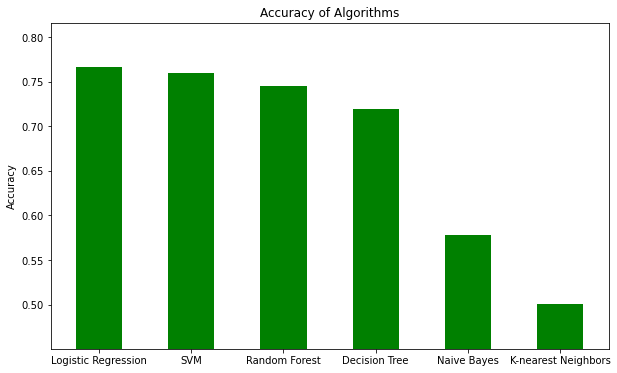

In [66]:
# plot the graph of accuracy of algorithms

plt.figure(figsize = (10, 6))
plt.bar(d2['Model'], d2['Accuracy'], width = 0.5, color = 'green')
plt.title('Accuracy of Algorithms')
plt.ylabel('Accuracy')

lower_bound = d2.iloc[-1, -1] - 0.05
upper_bound = d2.iloc[0, 1] + 0.05
plt.ylim(lower_bound, upper_bound)
plt.show()

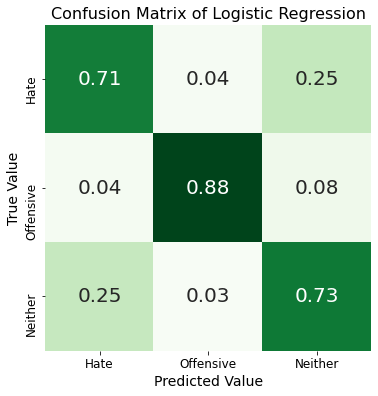

In [67]:
# visualize the confusion matrix of the most accurate algorithm

confusion_matrix_final = confusion_matrix(y_test, y_pred_lr)
matrix_proportions = np.zeros((3, 3))
for i in range(0,3):
    matrix_proportions[i, :] = confusion_matrix_final[i, :] / float(confusion_matrix_final[i, :].sum())
names = ['Hate', 'Offensive', 'Neither']
confusion_df = pd.DataFrame(matrix_proportions, index = names, columns = names)
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_df, annot = True, annot_kws = {"size": 20}, cmap = 'Greens', cbar = False, square = True,fmt = '.2f')
plt.title('Confusion Matrix of Logistic Regression', fontsize = 16)
plt.ylabel(r'True Value', fontsize = 14)
plt.xlabel(r'Predicted Value', fontsize = 14)
plt.tick_params(labelsize = 12)